# Demo No. 6 - Single System 

This particular tutorial will introduce a `SingleSystem` class dedicated to modelling of single star systems with surface features such as spots and pulsations. The syntax is very similar to binary system where we initially import necessary object classes: 

In [1]:
import numpy as np

from astropy import units as u

from elisa.single_system.system import SingleSystem
from elisa.base.star import Star

from elisa.observer.observer import Observer
from elisa import (
    const as c,
)


After that we can define our star and parameters of the single star system. Lets take a solar model as an example:

In [2]:
star = Star(
    mass=1.0*u.solMass,
    t_eff=5772*u.K,
    gravity_darkening=0.32,
    polar_log_g=4.43775*u.dex(u.cm/u.s**2),
    metallicity=0.0,
    discretization_factor=2
)

system = SingleSystem(
    star=star,
    gamma=0*u.km/u.s,
    inclination=90*u.deg,
    rotation_period=25.380*u.d,
    reference_time=0.0*u.d
)

2020-09-29 17:57:01,096 - 31167 - single_system.system - INFO: initialising object SingleSystem


As usual, we can acces dependent and independent atributes after system initialization in form of attributes:

Example of `Star` attributes used in `SingleSystem`:

In [3]:
print(
    f'mass = {system.star.mass * eu.MASS_UNIT:.3}, \n'
    f'surface_potential = {system.star.surface_potential:.3}, \n'  # rotational phase at `reference_time` 
    f'polar_radius = {system.star.polar_radius * eu.DISTANCE_UNIT:.3}'
)

mass = 1.99e+30 kg, 
surface_potential = -1.91e+11, 
polar_radius = 6.96e+08 m


and exsmple of `SingleSystem` attributes:

In [4]:
print(
    f'inclination = {system.inclination * eu.ARC_UNIT:.3}, \n'
    f'phase_shift = {system.phase_shift:.3}, \n'  # rotational phase at `reference_time` 
    f'angular_velocity = {system.angular_velocity * eu.ANGULAR_FREQUENCY_UNIT:.3}'
)

inclination = 1.57 rad, 
phase_shift = 0.0, 
angular_velocity = 2.87e-06 rad / s


Spots and pulsation are implemented into the `SingleStar` system exactly as in case of `BinarySystem` (see the corresponding tutorials). Approach to light curve calculation is also the same. As an example we can examine a value of a solar constant using our solar model (warning is caused by the usage of `bolometric` "passband"):

2020-09-29 17:57:01,134 - 31167 - observer.observer - INFO: initialising Observer instance
2020-09-29 17:57:01,142 - 31167 - observer.observer - INFO: observation is running
2020-09-29 17:57:01,151 - 31167 - single_system.surface.mesh - INFO: evaluating spots
2020-09-29 17:57:01,152 - 31167 - single_system.surface.mesh - INFO: no spots to evaluate
2020-09-29 17:57:01,449 - 31167 - observer.observer - INFO: observation finished


/home/cepheus/elisa_jupyter_environ/venv/lib/python3.6/site-packages/elisa/atm.py:405: UserWarning: You attempt to strip an atmosphere model to bandwidth which at least partially outside original atmosphere model wavelength coverage. This may cause problems.
  warnings.warn('You attempt to strip an atmosphere model to bandwidth which at least partially outside '


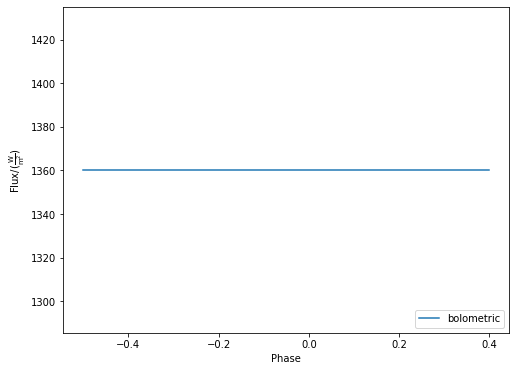

In [5]:
o = Observer(
    passband=['bolometric'],
    system=system
)

phases, curves = o.lc(
    from_phase=-0.5,
    to_phase=0.5,
    phase_step=0.1,
)

# recalculating to flux at distance 1 AU
for filter, flux in curves.items():
    flux *= 1.0 / (np.power(c.AU, 2))

o.plot.phase_curve(
    phases=phases,
    fluxes=curves,
    unit=u.W / u.m ** 2
)

Accesing surface geometry and other related parameters such as temperature, surface gravity acceleration, etc. is identical as demonstrated in binary system tutorials since all these attributes are stored in class `Star` which is used by both system types.